## Import required packages

In [2]:
from pathlib import Path # to interact with file system.
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables)
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype

import seaborn as sns
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pt
from matplotlib.dates import DateFormatter

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
%matplotlib inline

no display found. Using non-interactive Agg backend


## Loading and Examining the training dataset

In [3]:
transactions_df = pd.read_csv('TermData.csv')
transactions_df.shape

(1000, 9)

In [4]:
transactions_df.columns

Index(['seq_number', 'TotalTransactions', 'DaysLastUpdate', 'DaysSinceTrans',
       'MaleCustomer', 'OnlineCustomer', 'ResidentialCustomer',
       'CustomerLocation', 'CustSales'],
      dtype='object')

In [6]:
summary_stats = np.round(transactions_df.describe(), decimals=4)
#summary_stats.to_csv('summary.csv',index=True)
print(summary_stats)

       seq_number  TotalTransactions  DaysLastUpdate  DaysSinceTrans  \
count   1000.0000          1000.0000       1000.0000       1000.0000   
mean     500.5000             1.3830       2176.5150       2438.4560   
std      288.8194             1.4115       1140.9064       1065.1914   
min        1.0000            -4.0000          1.0000          1.0000   
25%      250.7500             1.0000       1135.0000       1679.7500   
50%      500.5000             1.0000       2324.0000       2723.0000   
75%      750.2500             2.0000       3167.2500       3340.5000   
max     1000.0000            15.0000       4188.0000       4188.0000   

       MaleCustomer  ResidentialCustomer  CustSales  
count     1000.0000            1000.0000   1000.000  
mean         0.4300               0.2250    250.580  
std          0.4953               0.4178    169.907  
min          0.0000               0.0000      3.000  
25%          0.0000               0.0000    138.000  
50%          0.0000        

In [7]:
data = pd.get_dummies(transactions_df, columns=['OnlineCustomer', 'CustomerLocation'], drop_first=True)

# Verify the column names
print(data.columns)

Index(['seq_number', 'TotalTransactions', 'DaysLastUpdate', 'DaysSinceTrans',
       'MaleCustomer', 'ResidentialCustomer', 'CustSales',
       'OnlineCustomer_yes', 'CustomerLocation_US'],
      dtype='object')


In [9]:
binary_variables = ['MaleCustomer','ResidentialCustomer', 'OnlineCustomer_yes', 'CustomerLocation_US']
# Total number of occurrences
total_occurrences = len(data)

# Iterate through each binary variable
for variable in binary_variables:
    count_variable_1 = data[variable].sum()
    percentage_variable_1 = (count_variable_1 / total_occurrences) * 100
    print(f"Percentage of '{variable}' equal to 1: {percentage_variable_1:.2f}%")

Percentage of 'MaleCustomer' equal to 1: 43.00%
Percentage of 'ResidentialCustomer' equal to 1: 22.50%
Percentage of 'OnlineCustomer_yes' equal to 1: 52.80%
Percentage of 'CustomerLocation_US' equal to 1: 47.20%


## Relationship between Sales amount and other numerical predictors

In [10]:
X = transactions_df[['TotalTransactions', 'DaysLastUpdate','DaysSinceTrans']]
formula = 'CustSales ~ ' + ' + '.join(X.columns)
transactions_lm1 = sm.ols(formula=formula, data=transactions_df).fit()
print(transactions_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              CustSales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     46.85
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.53e-28
Time:                        19:20:10   Log-Likelihood:                -6487.7
No. Observations:                1000   AIC:                         1.298e+04
Df Residuals:                     996   BIC:                         1.300e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           187.3113     14.43

## Visualization using Scatter plot - Sales amount and other numerical predictors

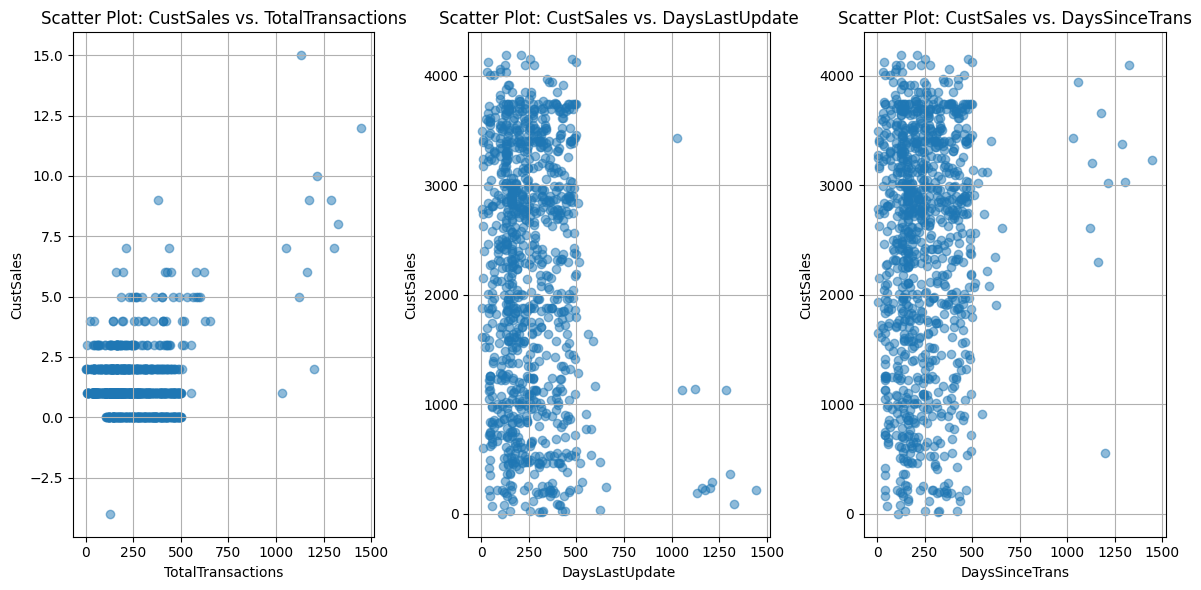

In [30]:
# List of the specified numerical columns for scatter plots
numerical_columns_to_plot = ['TotalTransactions', 'DaysLastUpdate','DaysSinceTrans']

# Create a subplot with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

# Create scatter plots for each specified numerical column against 'FARE'
for i, column in enumerate(numerical_columns_to_plot):
    ax = axes[i]
    ax.scatter(transactions_df['CustSales'], transactions_df[column], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('CustSales')
    ax.set_title(f'Scatter Plot: CustSales vs. {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Relationship between Sales amount and other Categorical predictors

In [32]:
X = data[['MaleCustomer','ResidentialCustomer', 'OnlineCustomer_yes', 'CustomerLocation_US']]
formula = "CustSales ~ " + ' + '.join(X.columns)
transactions_lm2 = sm.ols(formula=formula, data=data).fit()
print(transactions_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              CustSales   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.67
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.24e-16
Time:                        19:34:00   Log-Likelihood:                -6513.8
No. Observations:                1000   AIC:                         1.304e+04
Df Residuals:                     995   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Visualization using Box plot - Sales amount and other Categorical predictors

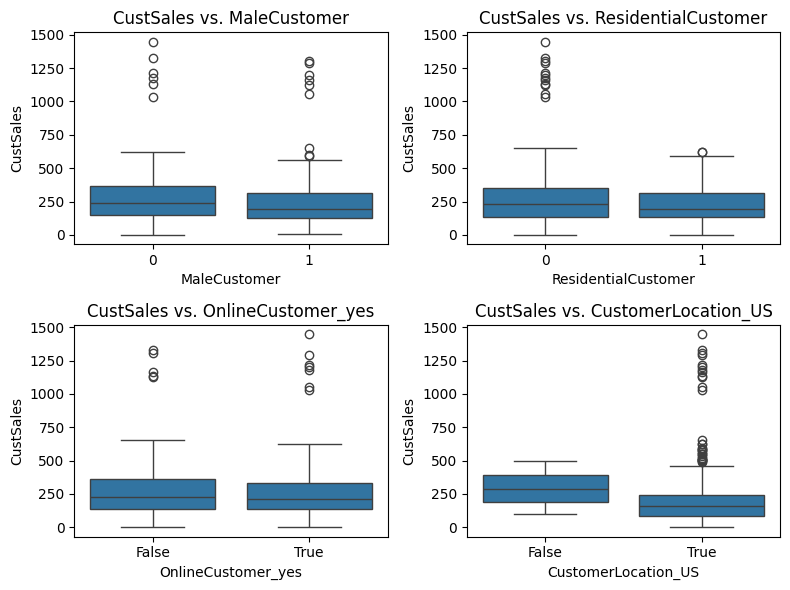

In [34]:
# Create side-by-side box plots for FARE vs. categorical predictors
plt.figure(figsize=(8, 6))

# Box plot for 'CustSales' vs. 'MaleCustomer'
plt.subplot(221)
sns.boxplot(x='MaleCustomer', y='CustSales', data=data)
plt.title('CustSales vs. MaleCustomer')

# Box plot for 'CustSales' vs. 'ResidentialCustomer'
plt.subplot(222)
sns.boxplot(x='ResidentialCustomer', y='CustSales', data=data)
plt.title('CustSales vs. ResidentialCustomer')

# Box plot for 'CustSales' vs. 'OnlineCustomer_yes'
plt.subplot(223)
sns.boxplot(x='OnlineCustomer_yes', y='CustSales', data=data)
plt.title('CustSales vs. OnlineCustomer_yes')

# Box plot for 'CustSales' vs. 'CustomerLocation_US'
plt.subplot(224)
sns.boxplot(x='CustomerLocation_US', y='CustSales', data=data)
plt.title('CustSales vs. CustomerLocation_US')

plt.tight_layout()
plt.show()

In [38]:
predictor_columns = ['TotalTransactions', 'DaysLastUpdate','DaysSinceTrans','MaleCustomer','ResidentialCustomer', 'OnlineCustomer', 'CustomerLocation']
target_variable = 'CustSales'

# Create the predictor and target DataFrames
X = pd.get_dummies(transactions_df[predictor_columns], columns=['OnlineCustomer','CustomerLocation'], drop_first=True)
y = transactions_df[target_variable]

# Split the data into a training set and a validation set
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

transactions_lm3 = LinearRegression()
transactions_lm3.fit(train_X, train_y)

# print coefficients
#print('intercept ', transactions_lm3.intercept_)
#print(pd.DataFrame({'Predictor': X.columns, 'coefficient': transactions_lm3.coef_}))

# print performance measures
#regressionSummary(train_y, transactions_lm3.predict(train_X))


LinearRegression()

## Exhaustive Search

In [39]:
#We will first define a couple of functions to be used in Exhaustive Search function
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    
# Define the width of output presentation to be wider to display results in two rows (instead of more rows otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
#print(pd.DataFrame(data)) #Good enough too. Variables appear in the same order in dataset 

# Reset the output width to the default. 
pd.reset_option('display.width')

   n     r2adj          AIC  CustomerLocation_US  DaysLastUpdate  DaysSinceTrans  MaleCustomer  \
0  1  0.120601  7796.471403                False           False           False         False   
1  2  0.353240  7613.108503                 True           False           False         False   
2  3  0.378443  7590.253991                 True           False           False         False   
3  4  0.383591  7586.256578                 True           False            True         False   
4  5  0.395848  7575.196938                 True            True            True         False   
5  6  0.395597  7576.434699                 True            True            True          True   
6  7  0.394772  7578.240377                 True            True            True          True   

   OnlineCustomer_yes  ResidentialCustomer  TotalTransactions  
0               False                False               True  
1               False                False               True  
2               False  

## Forward Selection

In [40]:
# The initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestFS_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: TotalTransactions, DaysLastUpdate, DaysSinceTrans, MaleCustomer, ResidentialCustomer, OnlineCustomer_yes, CustomerLocation_US
Start: score=7872.58, constant
Step: score=7796.47, add TotalTransactions
Step: score=7613.11, add CustomerLocation_US
Step: score=7590.25, add ResidentialCustomer
Step: score=7586.26, add DaysSinceTrans
Step: score=7575.20, add DaysLastUpdate
Step: score=7575.20, add None
['TotalTransactions', 'CustomerLocation_US', 'ResidentialCustomer', 'DaysSinceTrans', 'DaysLastUpdate']


In [41]:
regressionSummary(valid_y, bestFS_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -2.0476
       Root Mean Squared Error (RMSE) : 139.4757
            Mean Absolute Error (MAE) : 106.0060
          Mean Percentage Error (MPE) : -81.2847
Mean Absolute Percentage Error (MAPE) : 108.3554


## Developing Model using variables suggested in Exhaustive search

In [66]:
predictor_columns = ['TotalTransactions', 'CustomerLocation', 'ResidentialCustomer', 'DaysSinceTrans', 'DaysLastUpdate']#139
#predictor_columns = ['TotalTransactions', 'CustomerLocation', 'ResidentialCustomer', 'DaysSinceTrans']#140
#predictor_columns = ['TotalTransactions', 'CustomerLocation', 'ResidentialCustomer']#139

target_variable = 'CustSales'

# Create the predictor and target DataFrames
X = pd.get_dummies(transactions_df[predictor_columns], columns=['CustomerLocation'], drop_first=True)
y = transactions_df[target_variable]

# Split the data into a training set and a validation set
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

transactions_lmnew = LinearRegression()
transactions_lmnew.fit(train_X, train_y)


LinearRegression()

In [67]:
# Use predict() to make predictions on a new set
transactions_lmnew_pred = transactions_lmnew.predict(valid_X)

result = pd.DataFrame({'Predicted': transactions_lmnew_pred, 'Actual': valid_y,
                       'Residual': valid_y - transactions_lmnew_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, transactions_lmnew_pred)

      Predicted  Actual    Residual
507  322.755691     458  135.244309
818  323.453609     487  163.546391
452   78.555361     129   50.444639
368  257.579456     401  143.420544
242  127.550165      40  -87.550165
929   81.766653     160   78.233347
262  263.706560     406  142.293440
810  261.700034     156 -105.700034
318  127.859647     100  -27.859647
49   257.540247     285   27.459753
446  128.852114     130    1.147886
142  128.742329     130    1.257671
968  222.666426     160  -62.666426
345  309.754042     415  105.245958
971  140.602731     101  -39.602731
133  314.074855     148 -166.074855
104  386.799631     166 -220.799631
6    311.148156     162 -149.148156
600  310.491168     466  155.508832
496  259.532008     197  -62.532008

Regression statistics

                      Mean Error (ME) : -2.0476
       Root Mean Squared Error (RMSE) : 139.4757
            Mean Absolute Error (MAE) : 106.0060
          Mean Percentage Error (MPE) : -81.2847
Mean Absolute Percentage 